# 1주차 - 딥러닝과 TensorFlow 소개

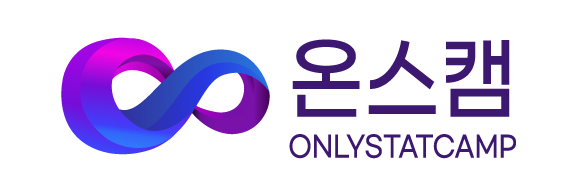

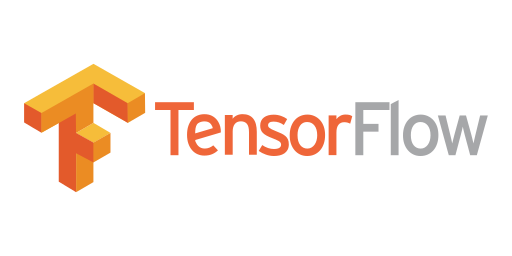

* 공식 홈페이지: https://www.tensorflow.org/tutorials?hl=ko
* Github 페이지: https://github.com/tensorflow/tensorflow

---

In [1]:
import pandas as pd

## TensorFlow 설정하기

시작하려면 TensorFlow를 프로그램으로 가져옵니다.

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

2024-01-17 18:23:15.788190: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-17 18:23:16.430911: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/juing/app/TensorRT-7.2.3.4/lib:/usr/lib/nvidia:/home/juing/.mujoco/mujoco210/bin:/usr/local/cuda-11.2/extras/CUPTI/lib64:/usr/local/cuda-11.2/lib64
2024-01-17 18:23:16.431064: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory

TensorFlow version: 2.11.0


[MNIST 데이터셋](http://yann.lecun.com/exdb/mnist/)을 로드하여 준비합니다. 샘플 값을 정수에서 부동소수로 변환합니다:

참고: 자체 개발 환경을 사용하는 경우에 TensorFlow 2 패키지를 설치하려면 최신 `pip`로 업그레이드했는지 확인합니다. 자세한 내용은 [설치 가이드](https://www.tensorflow.org/install)를 참조합니다.

## 데이터세트 로드하기

[MNIST 데이터세트](http://yann.lecun.com/exdb/mnist/)를 로드하고 준비합니다. 샘플 데이터를 정수에서 부동 소수점 숫자로 변환합니다.

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

---

## 모델 훈련

모델을 훈련하고 평가합니다: 

In [6]:
# 신경망 모델 구축
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# 모델 학습
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2966 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1444 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1090 - accuracy: 0.9667
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0888 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0758 - accuracy: 0.9758


`Model.evaluate` 메서드는 일반적으로 "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" 또는 "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)"에서 모델 성능을 확인합니다.

In [9]:
# 모델 평가
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0755 - accuracy: 0.9768 - 483ms/epoch - 2ms/step


[0.0754653662443161, 0.9768000245094299]

## 평가하기

모델이 확률을 반환하도록 하려면 다음과 같이 훈련된 모델을 래핑하고 여기에 소프트맥스를 첨부할 수 있습니다.

In [10]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [11]:
probability = probability_model(x_test)

In [12]:
probability

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0.08533956, 0.08533954, 0.0853398 , ..., 0.23192509, 0.08533954,
        0.08534158],
       [0.08534504, 0.08539832, 0.23183833, ..., 0.08534502, 0.08534741,
        0.08534502],
       [0.08535089, 0.23174562, 0.0853854 , ..., 0.08538257, 0.08537316,
        0.08535093],
       ...,
       [0.08533812, 0.08533812, 0.08533812, ..., 0.08533816, 0.08533813,
        0.08534744],
       [0.08533688, 0.08533688, 0.08533688, ..., 0.08533688, 0.08533783,
        0.08533688],
       [0.08533677, 0.08533677, 0.08533682, ..., 0.08533677, 0.08533677,
        0.08533677]], dtype=float32)>

In [13]:
probability_np = probability.numpy()

In [14]:
probability_np.shape

(10000, 10)

In [15]:
probability_pd = pd.DataFrame(probability_np, columns=[f"class_{i}" for i in range(10)])

In [16]:
probability_pd

,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9
0,0.085340,0.085340,0.085340,0.085356,0.085340,0.085340,0.085340,0.231925,0.085340,0.085342
1,0.085345,0.085398,0.231838,0.085346,0.085345,0.085345,0.085345,0.085345,0.085347,0.085345
2,0.085351,0.231746,0.085385,0.085352,0.085355,0.085352,0.085353,0.085383,0.085373,0.085351
3,0.231946,0.085338,0.085345,0.085338,0.085338,0.085340,0.085338,0.085339,0.085338,0.085338
4,0.085376,0.085376,0.085376,0.085376,0.231354,0.085376,0.085376,0.085378,0.085376,0.085638
...,...,...,...,...,...,...,...,...,...,...
9995,0.085337,0.085338,0.231963,0.085339,0.085337,0.085337,0.085337,0.085337,0.085337,0.085337
9996,0.085339,0.085339,0.085341,0.231941,0.085339,0.085348,0.085339,0.085339,0.085339,0.085339
9997,0.085338,0.085338,0.085338,0.085338,0.231948,0.085338,0.085338,0.085338,0.085338,0.085347
9998,0.085337,0.085337,0.085337,0.085337,0.085337,0.231967,0.085337,0.085337,0.085338,0.085337


In [17]:
probability_pd["Pred"] = probability_np.argmax(1)

probability_pd["Target"] = y_test

In [18]:
probability_pd

,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9,Pred,Target
0,0.085340,0.085340,0.085340,0.085356,0.085340,0.085340,0.085340,0.231925,0.085340,0.085342,7,7
1,0.085345,0.085398,0.231838,0.085346,0.085345,0.085345,0.085345,0.085345,0.085347,0.085345,2,2
2,0.085351,0.231746,0.085385,0.085352,0.085355,0.085352,0.085353,0.085383,0.085373,0.085351,1,1
3,0.231946,0.085338,0.085345,0.085338,0.085338,0.085340,0.085338,0.085339,0.085338,0.085338,0,0
4,0.085376,0.085376,0.085376,0.085376,0.231354,0.085376,0.085376,0.085378,0.085376,0.085638,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.085337,0.085338,0.231963,0.085339,0.085337,0.085337,0.085337,0.085337,0.085337,0.085337,2,2
9996,0.085339,0.085339,0.085341,0.231941,0.085339,0.085348,0.085339,0.085339,0.085339,0.085339,3,3
9997,0.085338,0.085338,0.085338,0.085338,0.231948,0.085338,0.085338,0.085338,0.085338,0.085347,4,4
9998,0.085337,0.085337,0.085337,0.085337,0.085337,0.231967,0.085337,0.085337,0.085338,0.085337,5,5


In [19]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [20]:
print(classification_report(probability_pd.Target, probability_pd.Pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



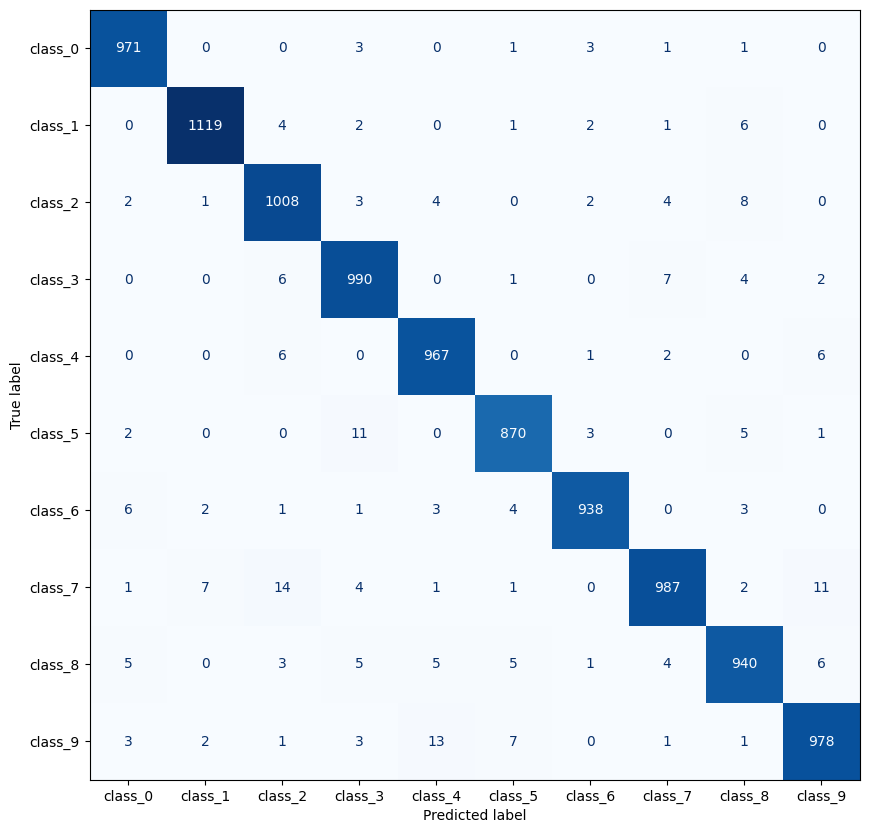

In [21]:
cm = confusion_matrix(probability_pd.Target, probability_pd.Pred)
dis = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=[f"class_{i}" for i in range(10)])
fig, ax = plt.subplots(figsize=(10, 10))
dis.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)